**MNIST(3&7)-Resnet18**

In [0]:
from fastai.vision import *
from fastai.metrics import accuracy

In [4]:
path = untar_data(URLs.MNIST_SAMPLE)
path

PosixPath('/root/.fastai/data/mnist_sample')

In [0]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=26)

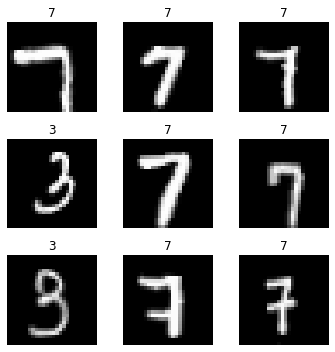

In [7]:
data.show_batch(rows=3, figsize=(5,5))

In [8]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)
learn.fit(2)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,accuracy,time
0,0.183863,0.096845,0.965653,00:18
1,0.127157,0.046596,0.983317,00:18


**Different ways of loading data in fastai**

ImageDataBunch.from_folder(),
ImageDataBunch.from_csv(),
ImageDataBunch.from_df(),
ImageDataBunch.from_name_re(),
ImageDataBunch.from_name_func(),
ImageDataBunch.from_lists()

In [9]:
import pandas as pd
df = pd.read_csv(path/'labels.csv')
df.head()

,name,label
0,train/3/7463.png,0
1,train/3/21102.png,0
2,train/3/31559.png,0
3,train/3/46882.png,0
4,train/3/26209.png,0


In [0]:
data = ImageDataBunch.from_csv(path, ds_tfms=tfms, size=28)

[0, 1]

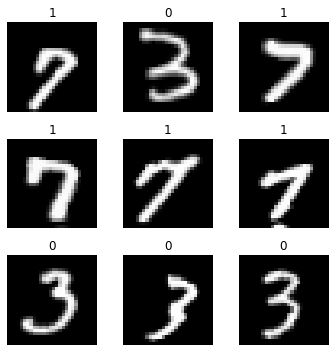

In [11]:
data.show_batch(rows=3, figsize=(5,5))
data.classes

In [12]:
data = ImageDataBunch.from_df(path, df, ds_tfms=tfms, size=24)
data.classes

[0, 1]

In [13]:
df

,name,label
0,train/3/7463.png,0
1,train/3/21102.png,0
2,train/3/31559.png,0
3,train/3/46882.png,0
4,train/3/26209.png,0
...,...,...
14429,valid/7/1321.png,1
14430,valid/7/8282.png,1
14431,valid/7/1949.png,1
14432,valid/7/3166.png,1


In [14]:
fn_name = [path/name for name in df['name']]
fn_name[:2]

[PosixPath('/root/.fastai/data/mnist_sample/train/3/7463.png'),
 PosixPath('/root/.fastai/data/mnist_sample/train/3/21102.png')]

In [15]:
pat = r"/(\d)/\d+\.png$"
data = ImageDataBunch.from_name_re(path, fn_name, pat, ds_tfms=tfms, size=24)
data.classes

['3', '7']

In [16]:
data = ImageDataBunch.from_name_func(path, fn_name, ds_tfms=tfms, size=24, label_func=lambda x: '3' if '/3/' in str(x) else '7')
data.classes

['3', '7']

In [18]:
labels = [('3' if '/3/' in str(x) else '7') for x in fn_name]
labels[:5]

['3', '3', '3', '3', '3']

In [19]:
data = ImageDataBunch.from_lists(path, fn_name, labels=labels, ds_tfms=tfms, size=24)
data.classes

['3', '7']

In [0]:
ImageDataBunch.fr